In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df_1 = pd.read_csv("modified_h4_summary.csv")
df_2 = pd.read_csv("modified_h4_summary_2.csv")

# 스타일 설정
sns.set(style="whitegrid")

In [9]:
df_1 = df_1[df_1['case'] == 2]
df_2 = df_2[df_2['case'].isin(['lz4', 'zstd'])]
df = pd.concat([df_1, df_2], ignore_index=True)
df

,work,hot,cold,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,...,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,compression_ratio,case
0,read,LZ4,ZSTD,2,13.210,679338,0,0,303849,0,...,0,0,0.000000,0.000000,1.293348,0.360654,0.000000,0.000000e+00,219.164247,2
1,write,LZ4,ZSTD,2,207.475,0,250001,97793434,473493367,16407310989,...,1000000,206043462,206.043462,0.034819,4.068118,0.435924,0.002090,7.908091e+07,173.140739,2
2,write,LZ4,ZSTD,1,302.003,0,249872,97813333,473931150,16407310892,...,1000000,300545816,300.545816,0.034847,4.067873,0.495435,0.003784,5.432830e+07,173.124652,2
3,read,LZ4,ZSTD,3,12.914,680621,0,0,256919,0,...,0,0,0.000000,0.000000,1.291659,0.370651,0.000000,0.000000e+00,262.901677,2
4,write,LZ4,ZSTD,3,236.236,0,250615,97797195,474219095,16407310467,...,1000000,234779240,234.779240,0.034864,4.062192,0.437008,0.002091,6.945305e+07,173.111953,2
5,read,LZ4,ZSTD,1,17.474,679087,0,0,314149,0,...,0,0,0.000000,0.000000,1.294637,0.312229,0.000000,0.000000e+00,211.345144,2
6,write,ZSTD,ZSTD,1,215.989,0,250256,59110061,266389530,16407311946,...,1000000,214501770,214.501770,0.019839,4.066604,0.441135,0.002091,7.596365e+07,316.967216,zstd
7,read,LZ4,LZ4,3,12.967,678509,0,0,442063,0,...,0,0,0.000000,0.000000,1.294274,0.363954,0.000000,0.000000e+00,147.191724,lz4
8,read,LZ4,LZ4,1,13.022,679645,0,0,442347,0,...,0,0,0.000000,0.000000,1.293015,0.367748,0.000000,0.000000e+00,147.174070,lz4
9,write,ZSTD,ZSTD,3,193.977,0,250372,59098541,266456545,16407310918,...,1000000,192408746,192.408746,0.019842,4.064333,0.438860,0.002091,8.458380e+07,316.969357,zstd


In [10]:
# 작업 유형별로 필터링
df_read = df[df['work'] == 'read']
df_write = df[df['work'] == 'write']

In [11]:
df_write_avg = df_write.groupby('case').mean(numeric_only=True).reset_index()
df_write_avg

,case,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,...,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,compression_ratio
0,2,2.0,248.571333,0.0,250162.666667,9.780132e+07,473881204.0,1.640731e+10,1.805998e+06,7.277188e+09,...,4.151452e+06,1000000.0,2.471228e+08,247.122839,0.034843,4.066061,0.456122,0.002655,6.762075e+07,173.125782
1,lz4,2.0,239.761000,0.0,250467.000000,1.144076e+08,526362366.0,1.640731e+10,1.806038e+06,7.281519e+09,...,3.979589e+06,1000000.0,2.382509e+08,238.250894,0.039054,4.063732,0.483252,0.002824,7.284414e+07,151.785743
2,zstd,2.0,198.049000,0.0,250197.000000,5.910408e+07,266382481.0,1.640731e+10,1.806074e+06,7.276511e+09,...,2.944509e+06,1000000.0,1.965329e+08,196.532892,0.019838,4.066608,0.439228,0.002091,8.320999e+07,316.969859


In [12]:
df_read_avg = df_read.groupby('case').mean(numeric_only=True).reset_index()
df_read_avg

,case,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,...,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,compression_ratio
0,2,2.0,14.532667,679682.0,0.0,0.0,2.916390e+05,0.0,1000000.0,1.266921e+10,...,0.0,0.0,0.0,0.0,0.0,1.293215,0.347845,0.0,0.0,231.137022
1,lz4,2.0,13.228000,678827.0,0.0,0.0,7.816750e+06,0.0,1000000.0,1.266248e+10,...,0.0,0.0,0.0,0.0,0.0,1.293901,0.276340,0.0,0.0,149.366756
2,zstd,2.0,13.383500,678565.0,0.0,0.0,2.294020e+05,0.0,1000000.0,1.265263e+10,...,0.0,0.0,0.0,0.0,0.0,1.294909,0.362556,0.0,0.0,297.605587


### Write

/tmp/ipykernel_3289/2432649000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)


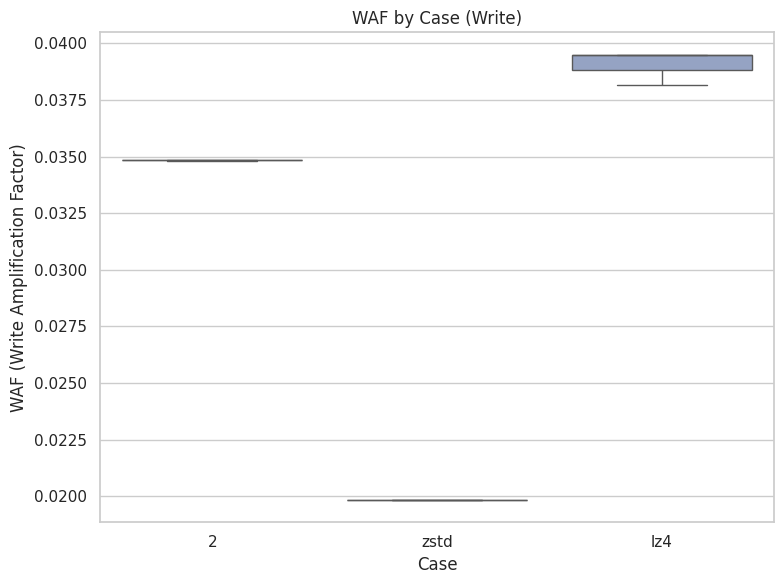

In [13]:
# Write 작업의 WAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)
plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_3289/205539061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='WAF', data=df_write_avg, palette='Set2')


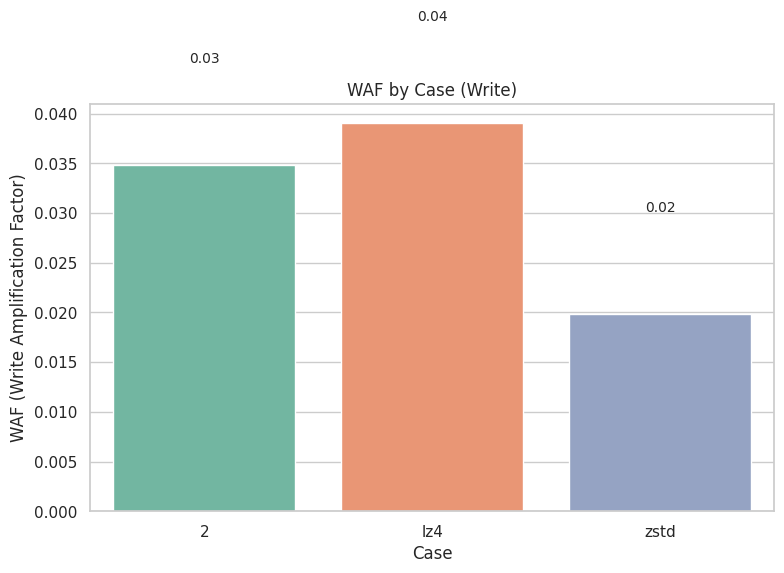

In [14]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='WAF', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')
plt.tight_layout()
plt.show()

In [15]:
df_write.groupby('case')['WAF'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
2,3.0,0.034843,0.000022,0.034819,0.034833,0.034847,0.034855,0.034864
lz4,3.0,0.039054,0.000770,0.038165,0.038828,0.039490,0.039498,0.039506
zstd,3.0,0.019838,0.000005,0.019833,0.019836,0.019839,0.019840,0.019842


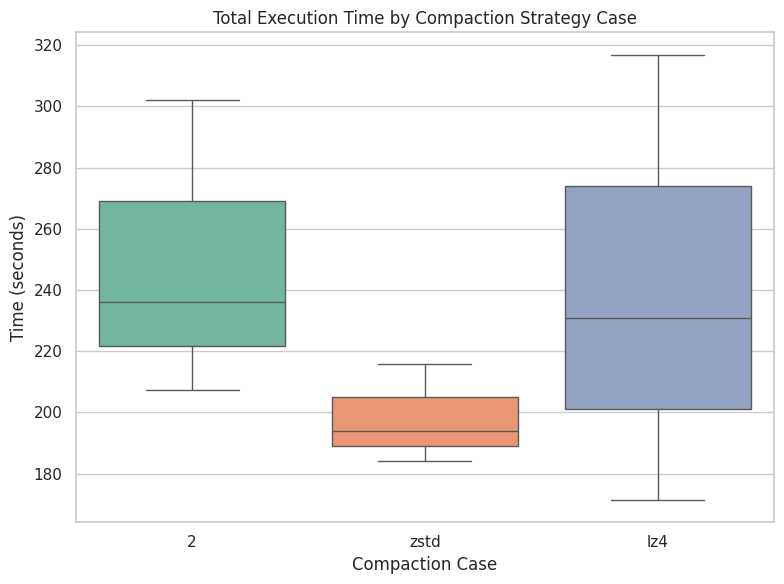

In [16]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3289/1952208775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_write_avg, palette='Set2')


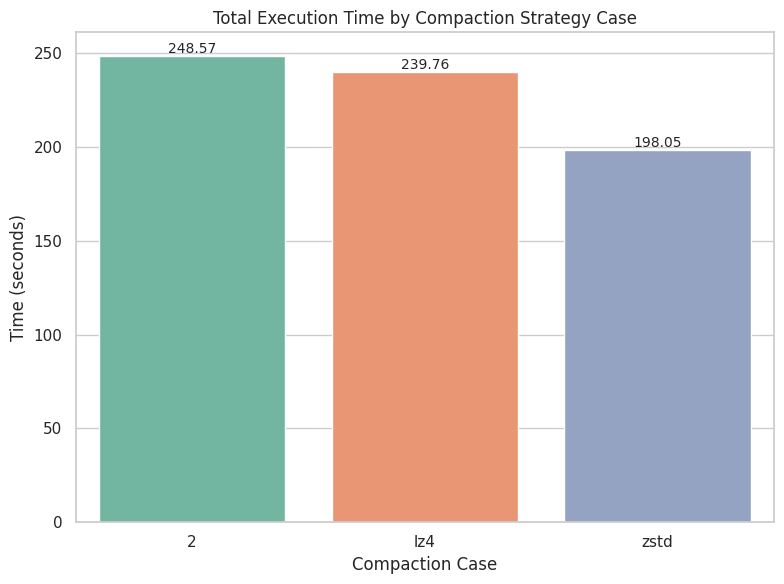

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

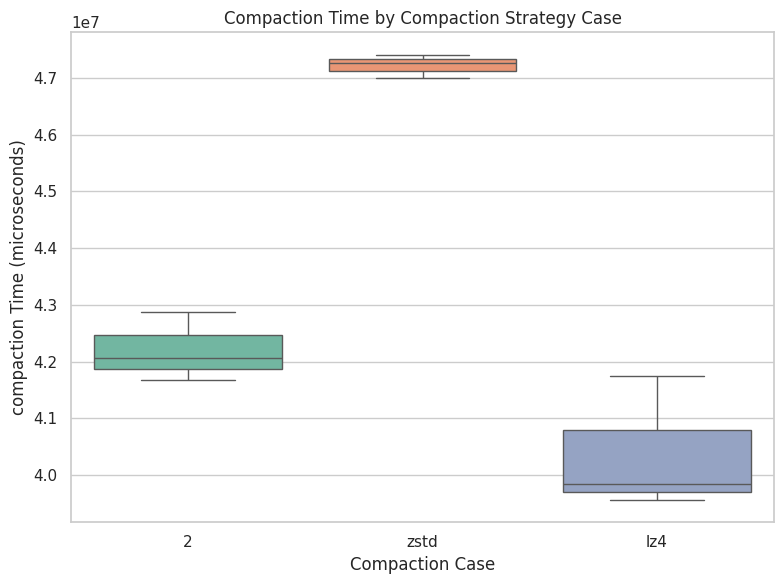

In [18]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Compaction Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('compaction Time (microseconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3289/1693509766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write_avg, palette='Set2')


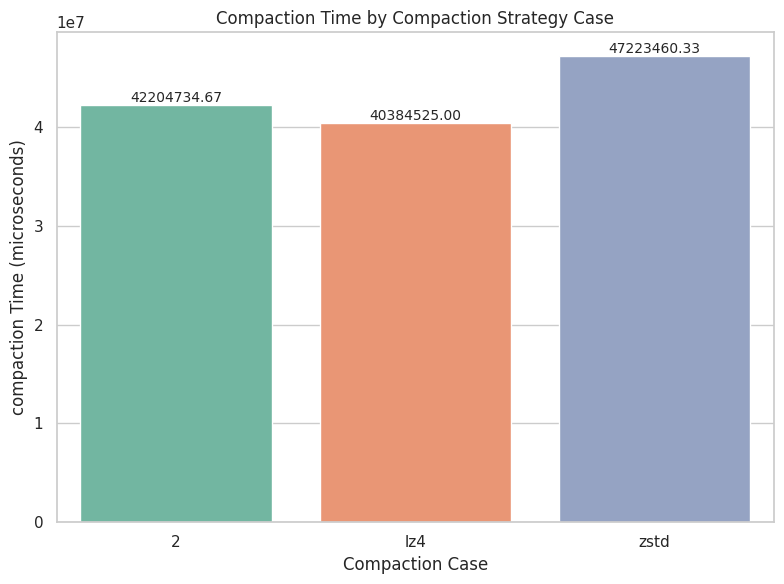

In [19]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compaction Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('compaction Time (microseconds)')
plt.tight_layout()
plt.show()

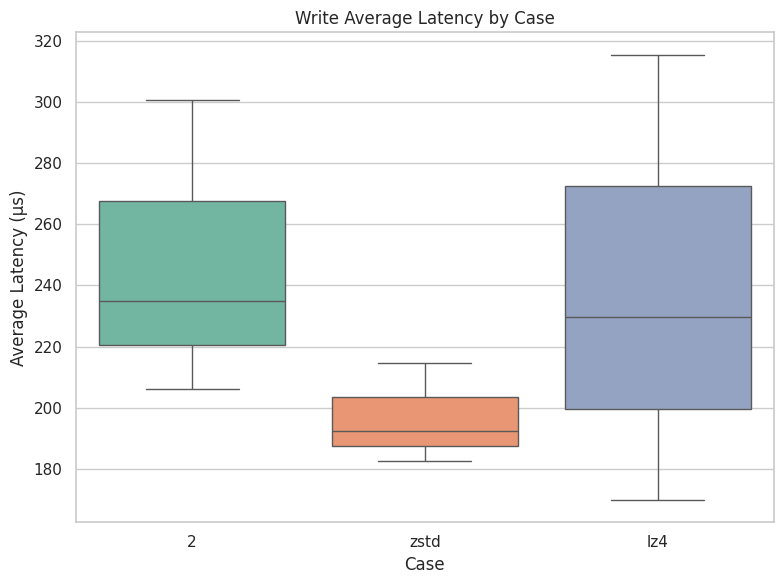

In [20]:
# Write Average Latency by Case
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='write.AVG', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3289/2588844532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='write.AVG', data=df_write_avg, palette='Set2')


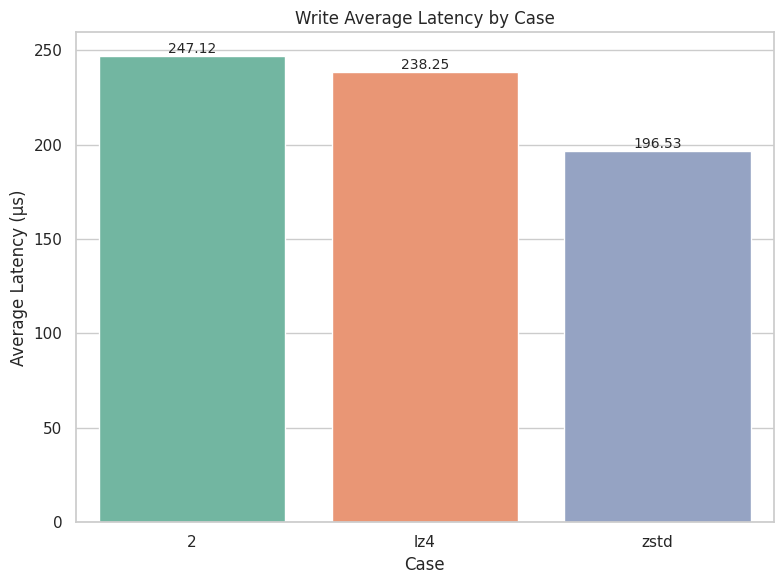

In [21]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='write.AVG', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

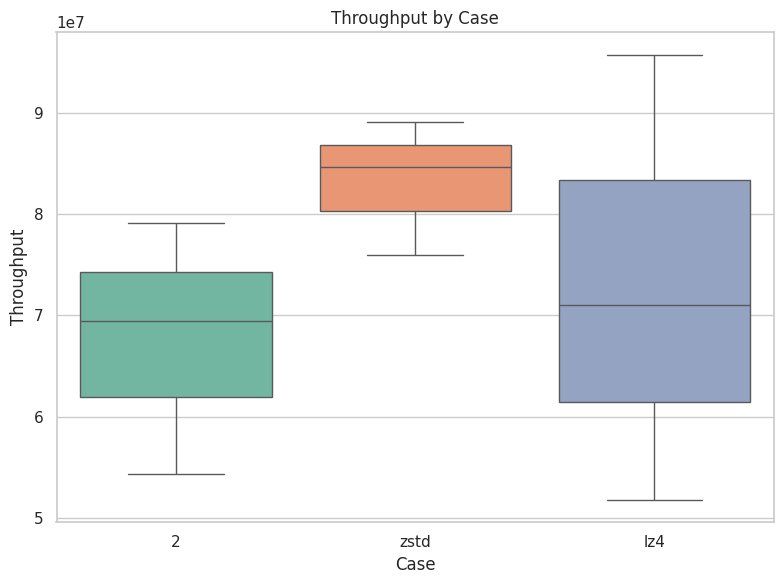

In [22]:
# Throughput
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='throughput', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Throughput by Case')
plt.ylabel('Throughput')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3289/3585659375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='throughput', data=df_write_avg, palette='Set2')


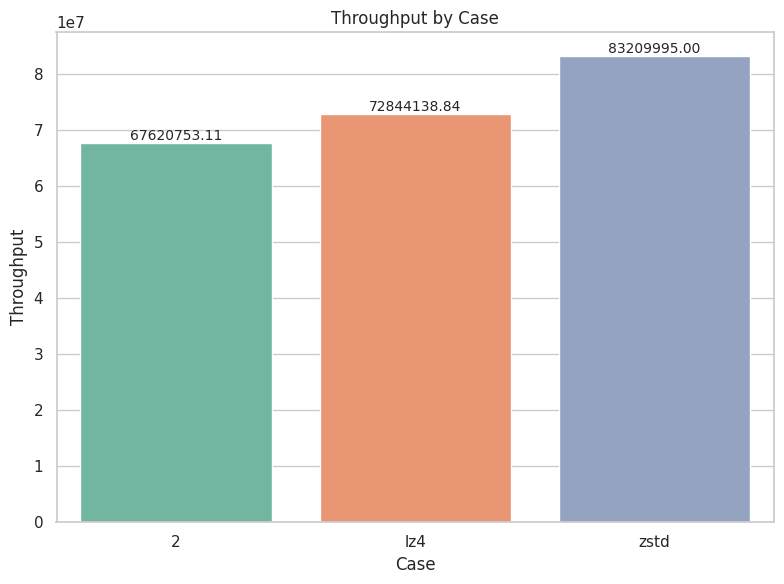

In [23]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='throughput', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Throughput by Case')
plt.ylabel('Throughput')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

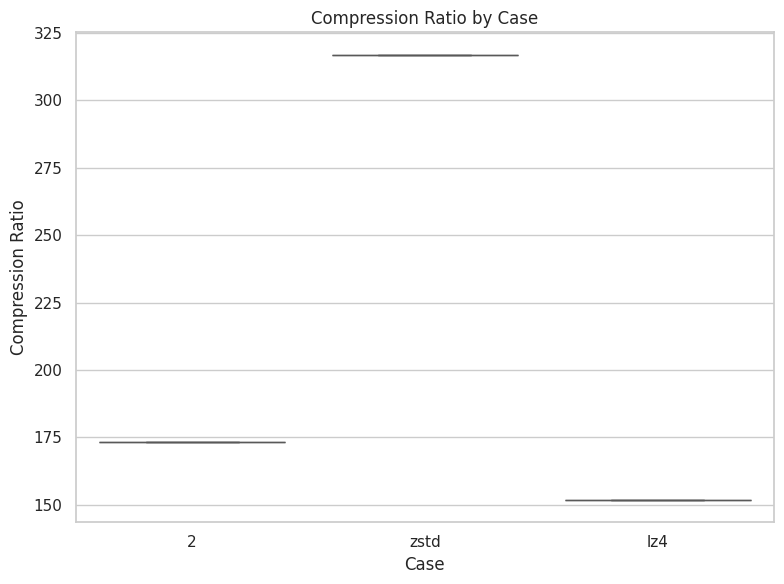

In [24]:
# compression ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='compression_ratio', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3289/1352047339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='compression_ratio', data=df_write_avg, palette='Set2')


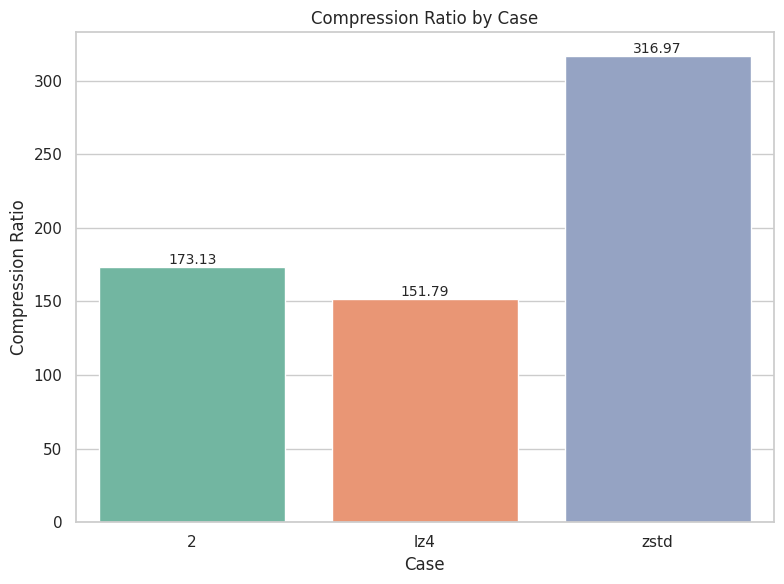

In [25]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='compression_ratio', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

### Read

/tmp/ipykernel_3289/1373416525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)


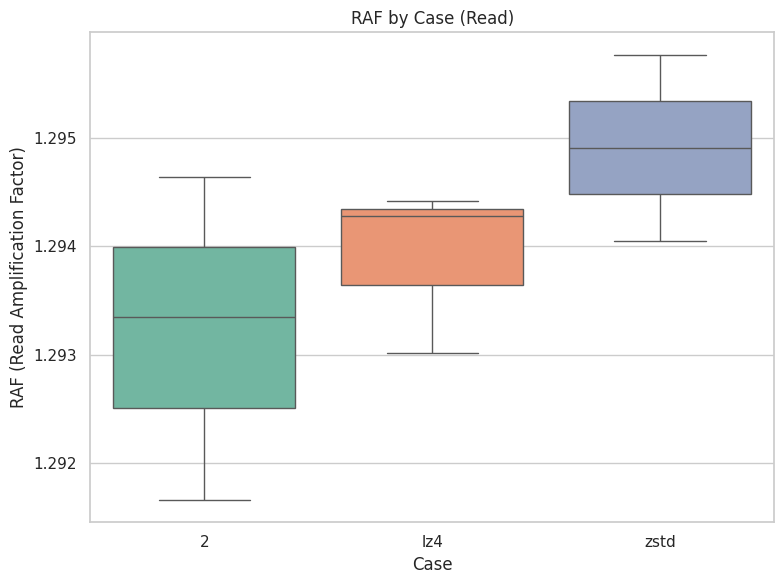

In [26]:
# RAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)
plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_3289/2467909650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='RAF', data=df_read_avg, palette='Set2')


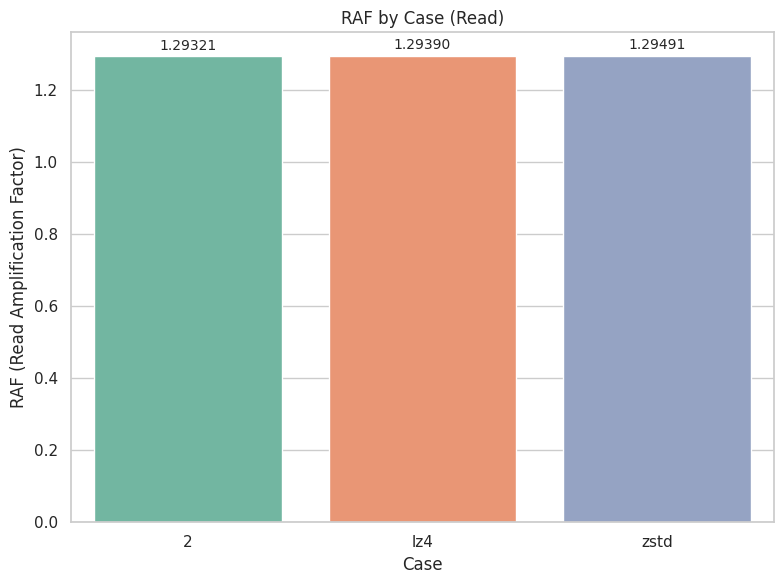

In [27]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='RAF', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.5f}', ha='center', va='bottom', fontsize=10)

plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')
plt.tight_layout()
plt.show()

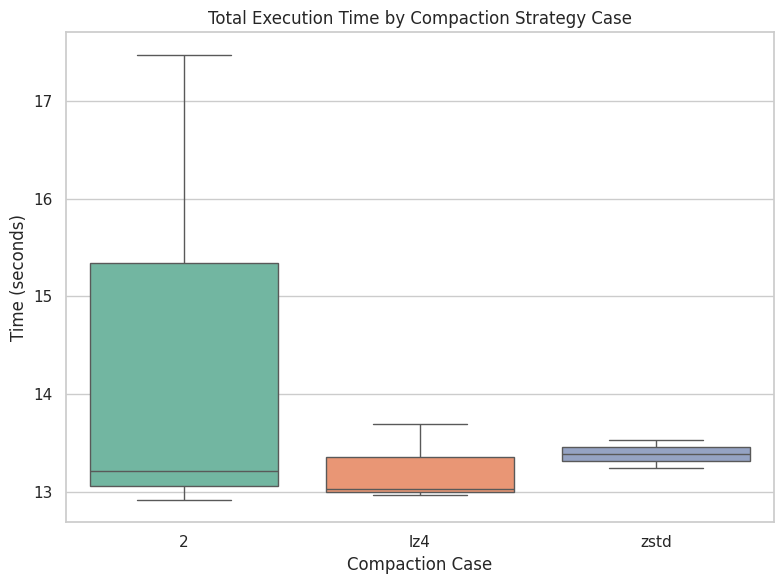

In [28]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3289/2413868267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_read_avg, palette='Set2')


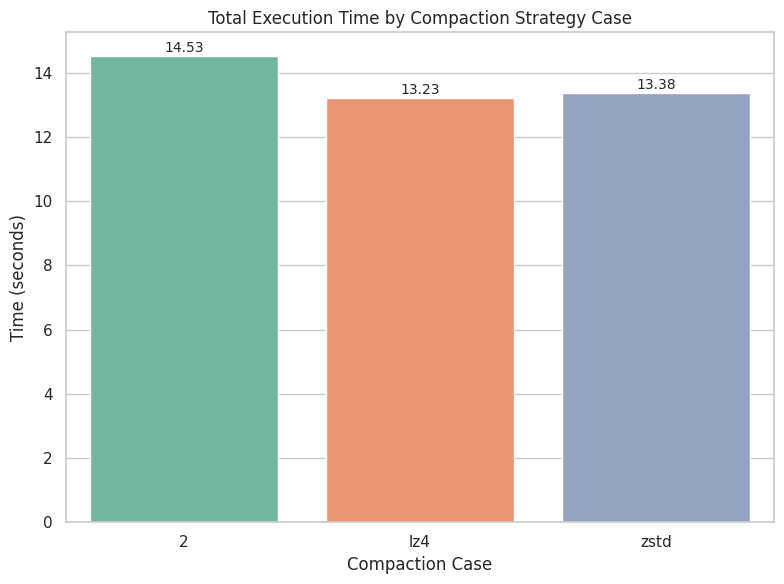

In [29]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

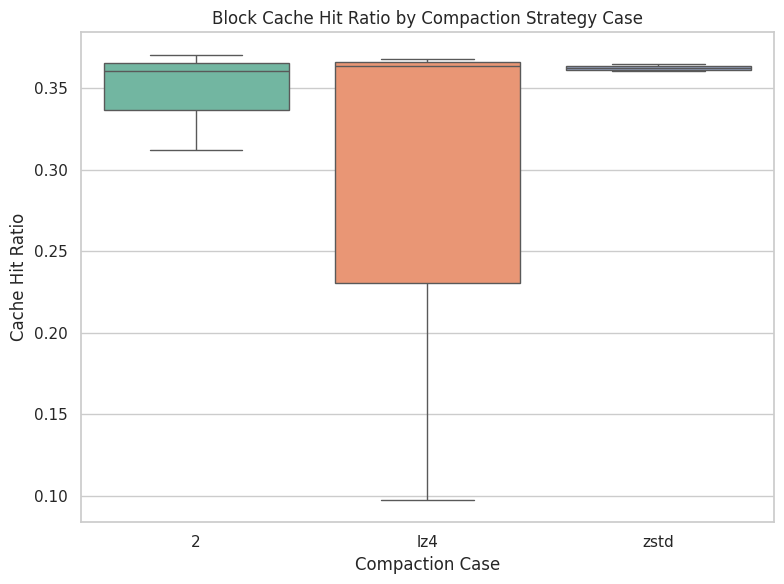

In [30]:
# ------------------------------------
# 3. Block Cache Hit Ratio by Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3289/921772678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_read_avg, palette='Set2')


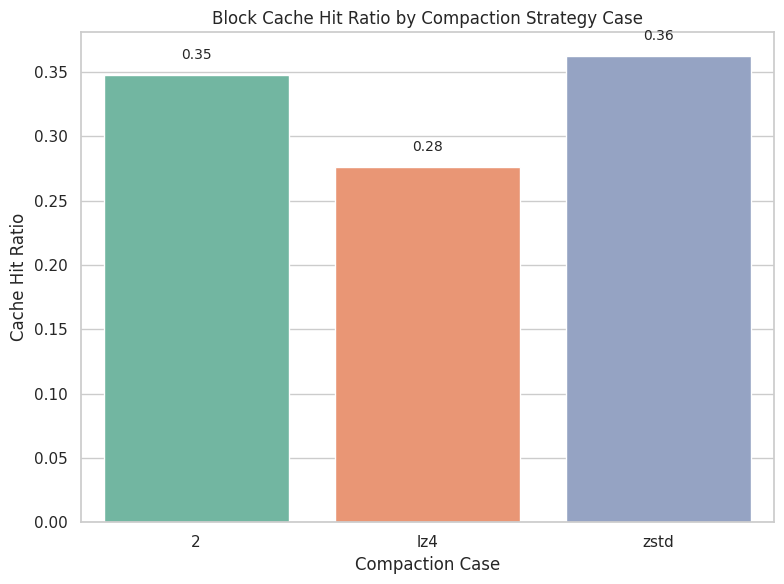

In [31]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

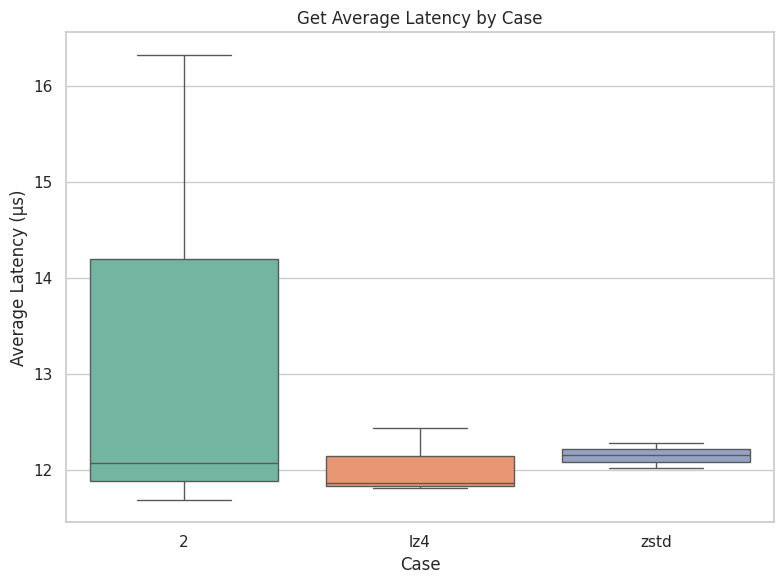

In [32]:
# Latency
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='get.AVG', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Get Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3289/2039202209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='get.AVG', data=df_read_avg, palette='Set2')


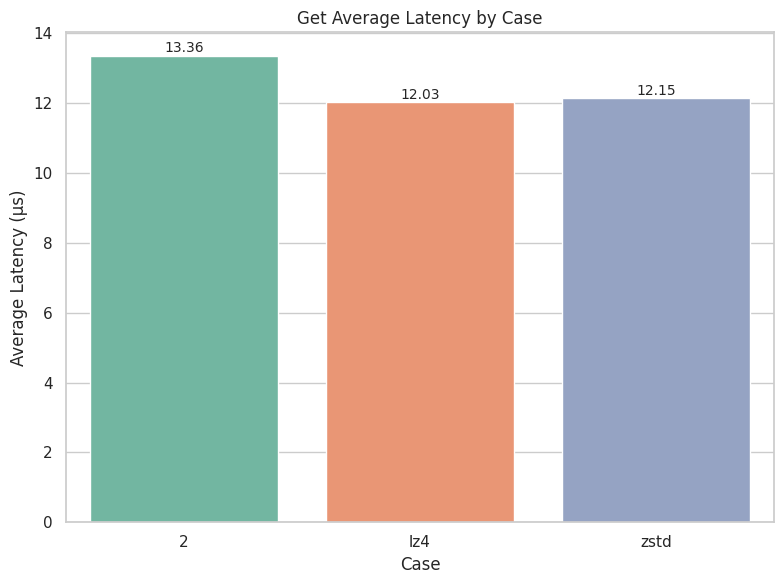

In [33]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='get.AVG', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Get Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

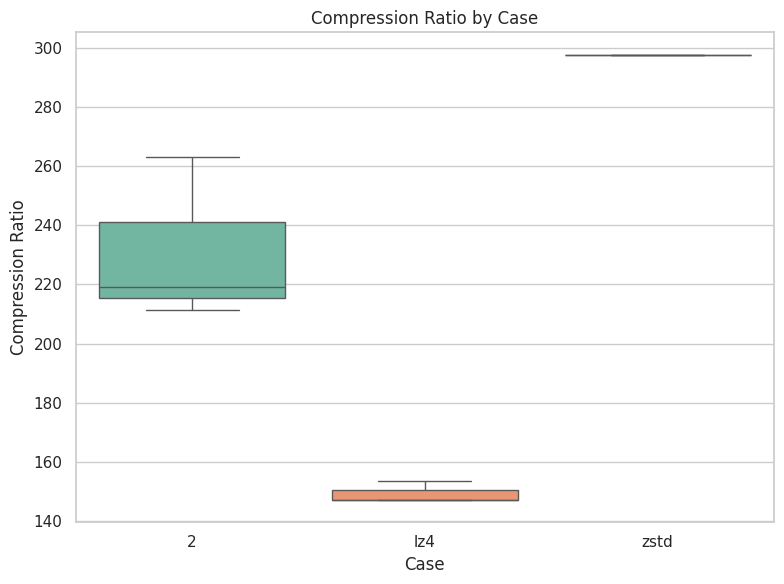

In [34]:
# compression ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='compression_ratio', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_3289/1598831252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='compression_ratio', data=df_read_avg, palette='Set2')


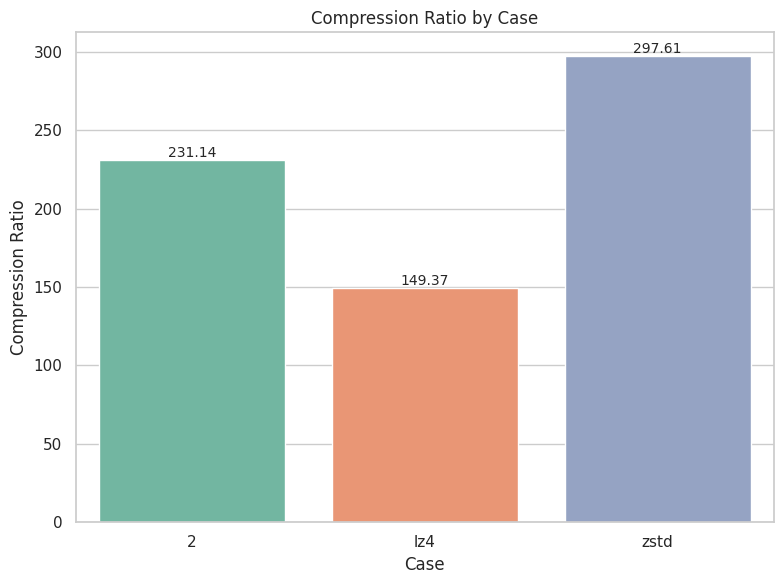

In [35]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='compression_ratio', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()